# **Titanic-EDA**

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
import numpy as np

### Load Data and Initial Inspection Goal:
* Load the dataset.
* Perform an initial inspection to understand its structure, check for missing values, and get a glimpse of the data.

In [3]:
# 1. Load Data
url = "https://raw.githubusercontent.com/SiddardhaShayini/Titanic-EDA/refs/heads/main/Cleaned_Titanic-Dataset.csv"
df = pd.read_csv(url)

In [37]:
# Display the first few rows of the dataframe
print("First 5 rows of the dataset:")
df.head()

First 5 rows of the dataset:


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S,FamilySize
0,0,3,0,-0.565736,1,0,-0.502445,False,False,True,2
1,1,3,1,-0.258337,0,0,-0.488854,False,False,True,1
2,1,1,1,0.433312,1,0,0.420730,False,False,True,2
3,0,3,0,0.433312,0,0,-0.486337,False,False,True,1
4,0,3,0,-0.104637,0,0,-0.478116,False,True,False,1


In [5]:
# Display basic information about the dataset (data types, non-null values)
print("\nDataset Info:")
df.info()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 577 entries, 0 to 576
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    577 non-null    int64  
 1   Pclass      577 non-null    int64  
 2   Sex         577 non-null    int64  
 3   Age         577 non-null    float64
 4   SibSp       577 non-null    int64  
 5   Parch       577 non-null    int64  
 6   Fare        577 non-null    float64
 7   Embarked_C  577 non-null    bool   
 8   Embarked_Q  577 non-null    bool   
 9   Embarked_S  577 non-null    bool   
dtypes: bool(3), float64(2), int64(5)
memory usage: 33.4 KB


In [6]:
# Check for missing values
print("\nMissing values before cleaning (if any were present initially):")
print(df.isnull().sum())


Missing values before cleaning (if any were present initially):
Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64


### Generate Summary Statistics Goal:
* Understand the central tendency, dispersion, and shape of the dataset's distribution by calculating descriptive statistics for numerical columns and frequency counts for categorical/boolean columns.

In [7]:
# Summary statistics for numerical features
# Age, SibSp, Parch, Fare are numerical
print("\nSummary statistics for numerical features:")
print(df[['Age', 'SibSp', 'Parch', 'Fare']].describe())


Summary statistics for numerical features:
              Age       SibSp  Parch        Fare
count  577.000000  577.000000  577.0  577.000000
mean    -0.004480    0.199307    0.0   -0.347884
std      0.657194    0.445034    0.0    0.253828
min     -1.872184    0.000000    0.0   -0.648422
25%     -0.412037    0.000000    0.0   -0.491874
50%     -0.104637    0.000000    0.0   -0.474005
75%      0.241187    0.000000    0.0   -0.329287
max      1.893459    2.000000    0.0    0.583318


In [8]:
# Summary statistics (value counts) for 'Survived', 'Pclass', 'Sex', and the 'Embarked' one-hot encoded columns
print("\nValue counts for 'Survived' (Target Variable):")
print(df['Survived'].value_counts())
print("\nSurvival Rate:")
print(df['Survived'].value_counts(normalize=True) * 100) # Percentage


Value counts for 'Survived' (Target Variable):
Survived
0    404
1    173
Name: count, dtype: int64

Survival Rate:
Survived
0    70.017331
1    29.982669
Name: proportion, dtype: float64


In [9]:
print("\nValue counts for 'Pclass':")
print(df['Pclass'].value_counts())
print("\nValue counts for 'Sex':")
print(df['Sex'].value_counts()) # Sex is encoded as 0/1, so 0 for female, 1 for male typically


Value counts for 'Pclass':
Pclass
3    373
2    121
1     83
Name: count, dtype: int64

Value counts for 'Sex':
Sex
0    434
1    143
Name: count, dtype: int64


In [10]:
print("\nValue counts for 'Embarked_C':")
print(df['Embarked_C'].value_counts())
print("\nValue counts for 'Embarked_Q':")
print(df['Embarked_Q'].value_counts())
print("\nValue counts for 'Embarked_S':")
print(df['Embarked_S'].value_counts())


Value counts for 'Embarked_C':
Embarked_C
False    497
True      80
Name: count, dtype: int64

Value counts for 'Embarked_Q':
Embarked_Q
False    513
True      64
Name: count, dtype: int64

Value counts for 'Embarked_S':
Embarked_S
True     433
False    144
Name: count, dtype: int64


### Create Histograms, Boxplots, and Bar Plots for Feature Distributions
* Visualize the distribution of individual features. Histograms and boxplots are used for numerical features to show spread and identify outliers, while bar plots are ideal for categorical and boolean features to show proportions and counts.

In [11]:
# 3. Create Histograms, Boxplots, and Bar Plots for Feature Distributions
print("\n--- Part 3: Create Histograms, Boxplots, and Bar Plots for Feature Distributions ---")


--- Part 3: Create Histograms, Boxplots, and Bar Plots for Feature Distributions ---


In [12]:
# Numerical features for distribution plots
numerical_cols = ['Age', 'SibSp', 'Parch', 'Fare']

In [13]:
# Categorical/Boolean features for bar plots
categorical_cols = ['Survived', 'Pclass', 'Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S']


--- Histograms and Boxplots for Numerical Features ---


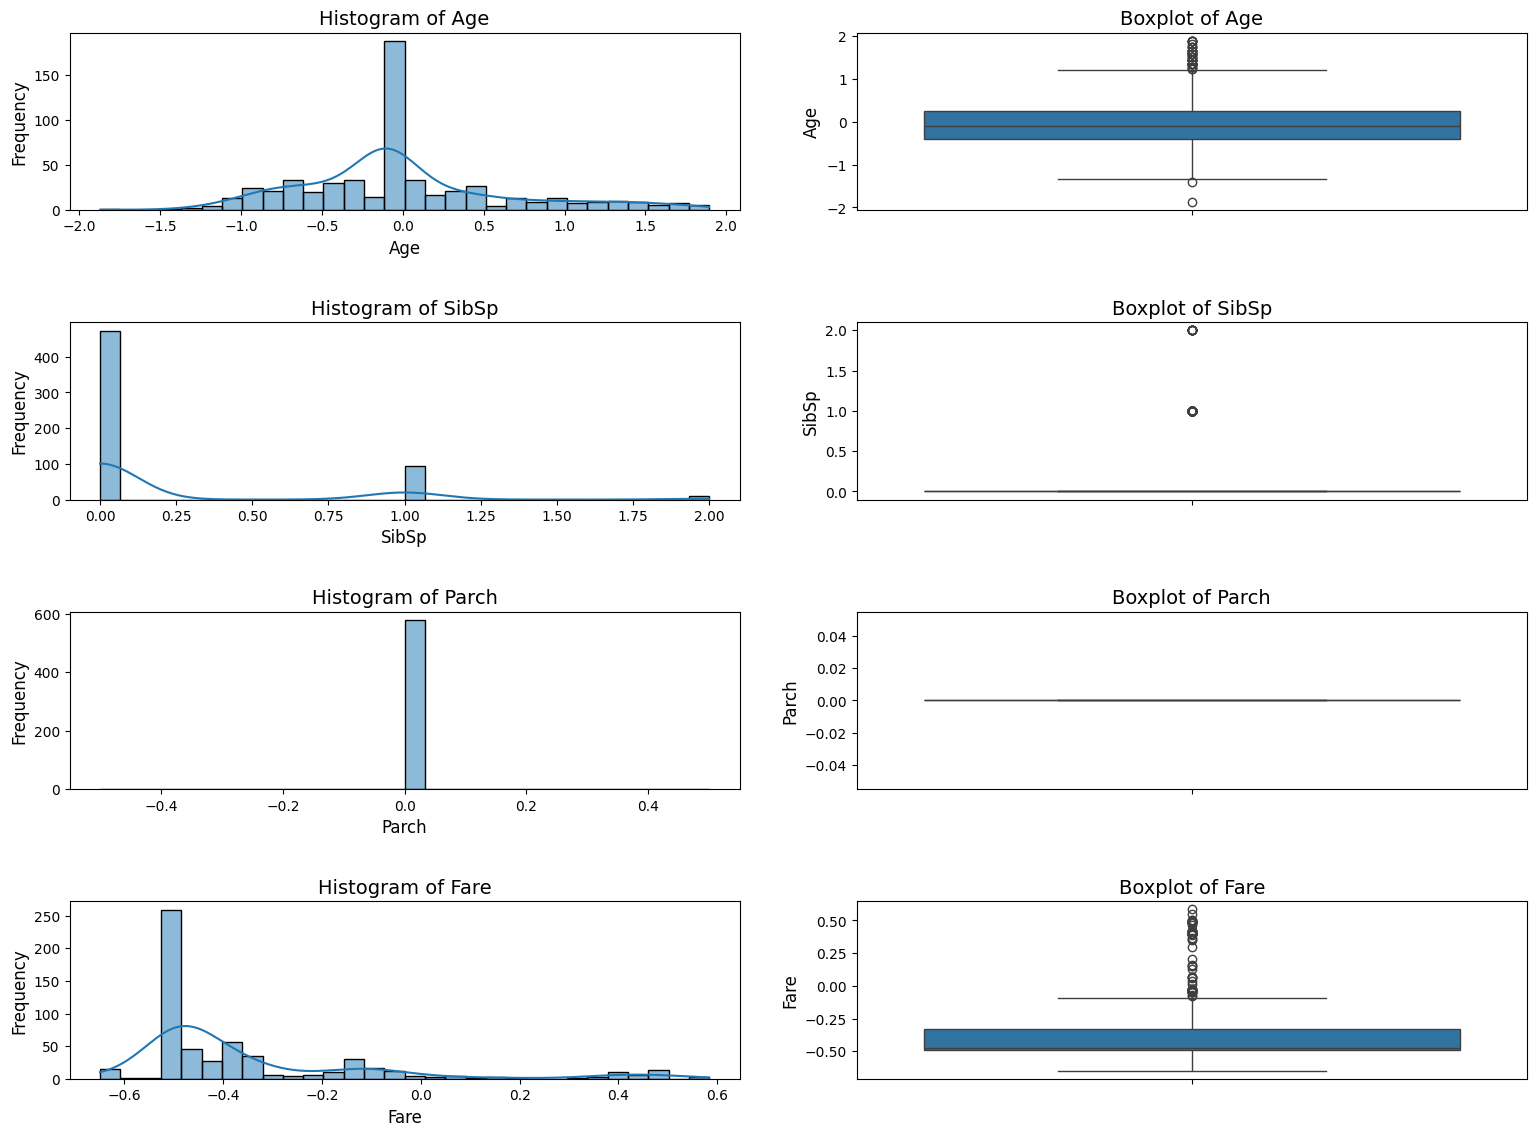

In [14]:
# --- Histograms and Boxplots for Numerical Features ---
print("\n--- Histograms and Boxplots for Numerical Features ---")
plt.figure(figsize=(16, 12))
for i, col in enumerate(numerical_cols):
    # Histogram
    plt.subplot(len(numerical_cols), 2, 2*i + 1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Histogram of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    # Boxplot
    plt.subplot(len(numerical_cols), 2, 2*i + 2)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}', fontsize=14)
    plt.ylabel(col, fontsize=12)
plt.tight_layout(pad=3.0)
plt.show()


--- Bar Plots for Categorical/Boolean Features ---


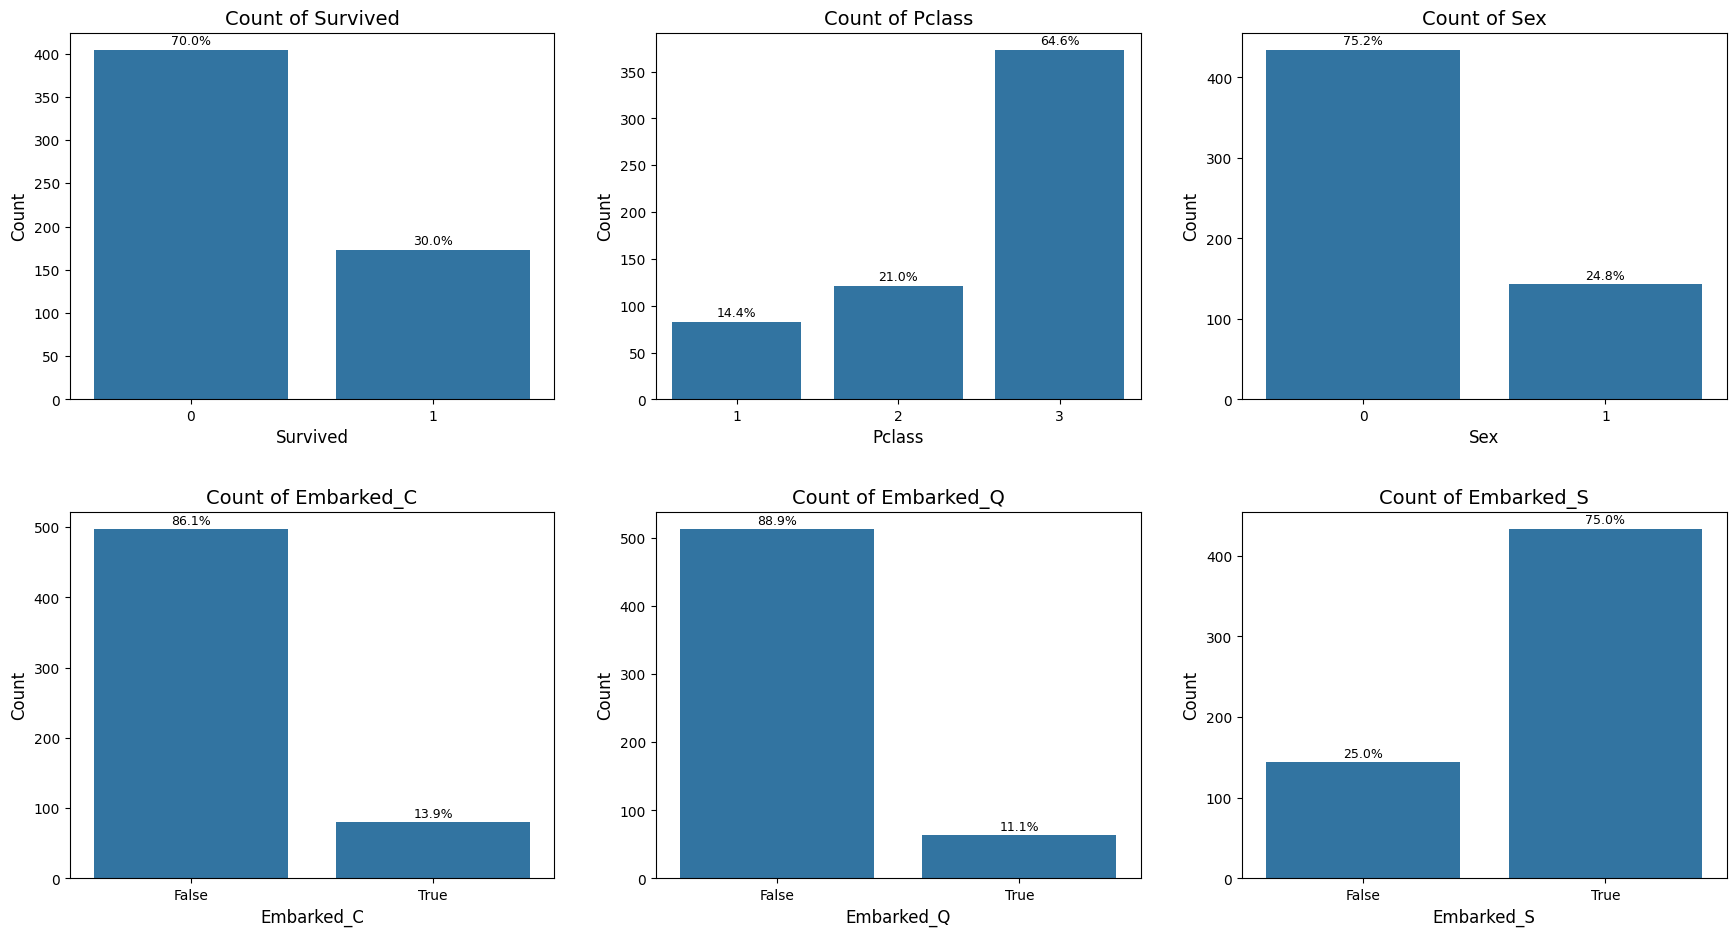

In [15]:
# --- Bar Plots for Categorical/Boolean Features ---
print("\n--- Bar Plots for Categorical/Boolean Features ---")
plt.figure(figsize=(18, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 3, i + 1) # Adjust subplot grid based on number of columns
    sns.countplot(x=df[col])
    plt.title(f'Count of {col}', fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel('Count', fontsize=12)

    # Adding percentage labels for better readability
    total = len(df[col])
    for p in plt.gca().patches:
        height = p.get_height()
        plt.gca().text(p.get_x() + p.get_width()/2., height + 3,
                       '{:1.1f}%'.format(100*height/total), ha="center", va='bottom', fontsize=9)
plt.tight_layout(pad=3.0)
plt.show()

In [16]:
# Interactive Histograms and Boxplots (Plotly)
print("\n--- Interactive Plots (using Plotly) ---")
try:
    for col in numerical_cols:
        fig_hist = px.histogram(df, x=col, title=f'Interactive Histogram of {col}', marginal='box')
        fig_hist.show()
except Exception as e:
    print(f"Could not generate interactive numerical plots with Plotly. Error: {e}")

try:
    for col in categorical_cols:
        fig_bar = px.bar(df, x=col, title=f'Interactive Count Plot of {col}', color=col)
        fig_bar.show()
except Exception as e:
    print(f"Could not generate interactive categorical plots with Plotly. Error: {e}")


--- Interactive Plots (using Plotly) ---


### Explore Feature Relationships (Correlation and Bivariate Analysis)
* Understand how features relate to each other and, crucially, how each feature impacts the Survived target variable. This involves correlation matrices for numerical relationships and various bivariate plots for categorical and numerical feature interactions.


--- Correlation Matrix of Numerical Features ---
Correlation Matrix (Numerical Features vs. Survived):
          Survived    Pclass       Age     SibSp  Parch      Fare
Survived  1.000000 -0.242189  0.009310  0.097999    NaN  0.268890
Pclass   -0.242189  1.000000 -0.363467 -0.078664    NaN -0.670942
Age       0.009310 -0.363467  1.000000  0.029707    NaN  0.265009
SibSp     0.097999 -0.078664  0.029707  1.000000    NaN  0.345588
Parch          NaN       NaN       NaN       NaN    NaN       NaN
Fare      0.268890 -0.670942  0.265009  0.345588    NaN  1.000000


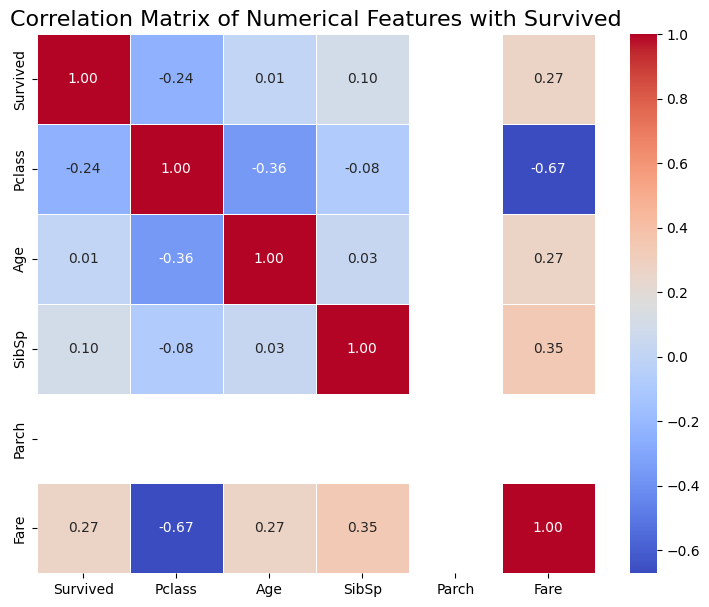

In [17]:
# --- Correlation Matrix for Numerical Features ---
print("\n--- Correlation Matrix of Numerical Features ---")
# Include 'Survived' in correlation to see its relation with other numerics
correlation_data = df[['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
correlation_matrix = correlation_data.corr()
print("Correlation Matrix (Numerical Features vs. Survived):")
print(correlation_matrix)

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features with Survived', fontsize=16)
plt.show()


--- Pairplot of Key Features ---


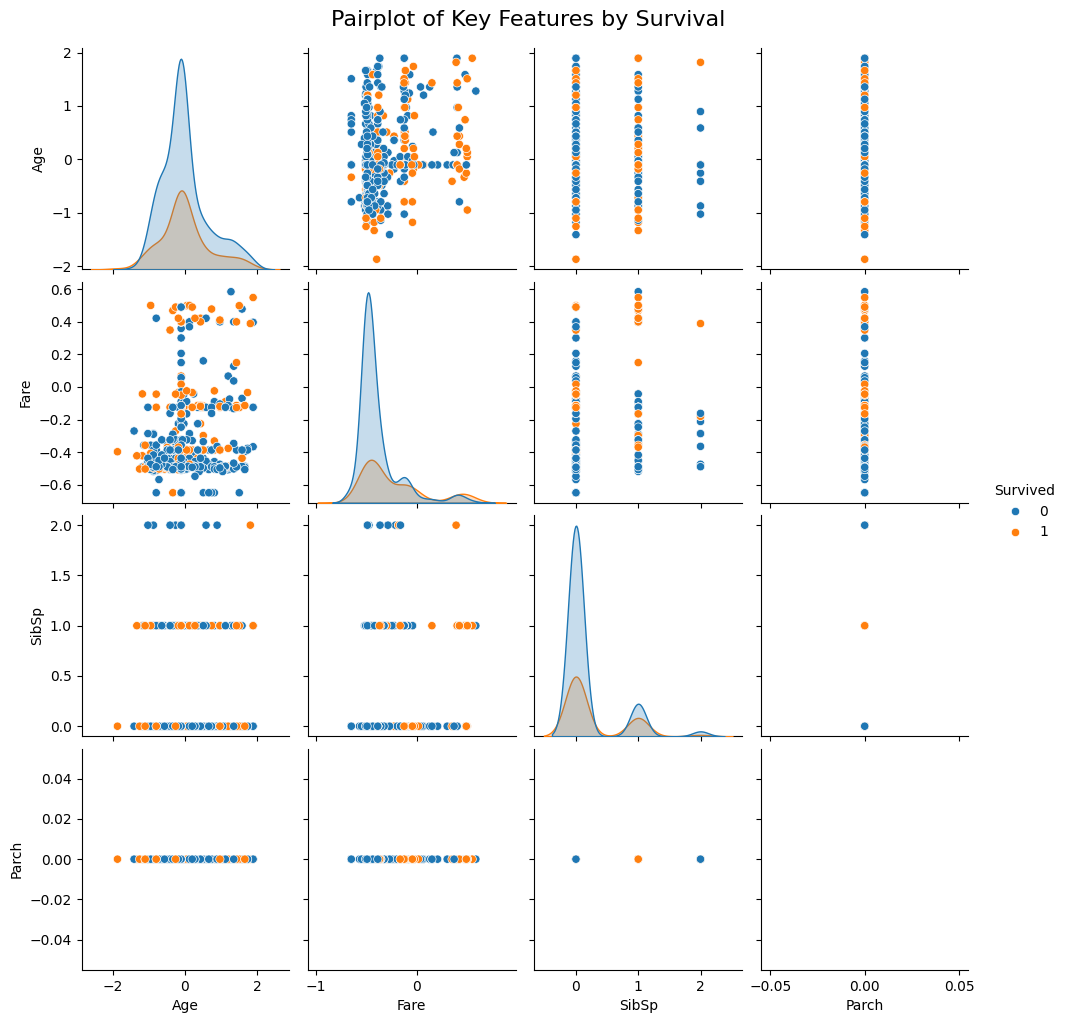

In [18]:
# --- Pairplot (for overall relationships and distributions) ---
print("\n--- Pairplot of Key Features ---")
# Use a subset of numerical columns for a cleaner pairplot
# Including 'Survived' as hue to see distributions by survival status
pairplot_cols = ['Age', 'Fare', 'SibSp', 'Parch', 'Survived']
if len(pairplot_cols) <= 7: # To prevent overly crowded plots
    sns.pairplot(df[pairplot_cols], hue='Survived', diag_kind='kde')
    plt.suptitle('Pairplot of Key Features by Survival', y=1.02, fontsize=16)
    plt.show()
else:
    print(f"Skipping pairplot as there are too many columns ({len(pairplot_cols)}) for clear visualization.")

In [19]:
# Interactive Pairplot (Plotly)
print("\n--- Interactive Pairplot (using Plotly) ---")
try:
    fig_plotly_pair = px.scatter_matrix(df, dimensions=pairplot_cols, color="Survived",
                                        title="Interactive Pairplot of Titanic Data (by Survived)")
    fig_plotly_pair.show()
except Exception as e:
    print(f"Could not generate interactive pairplot with Plotly. Error: {e}")


--- Interactive Pairplot (using Plotly) ---



--- Bivariate Analysis: Categorical Features vs. Survived ---


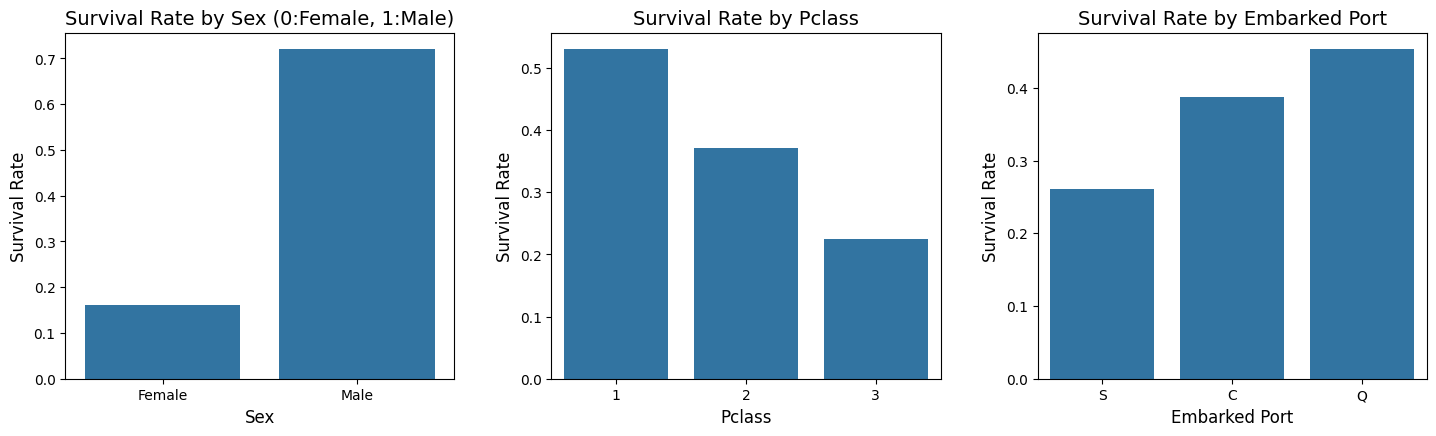

In [20]:
# --- Bivariate Analysis: Categorical vs. Survived (Bar Plots) ---
print("\n--- Bivariate Analysis: Categorical Features vs. Survived ---")
# Using the 'Sex' column, which is 0/1 (0=female, 1=male, typically)
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(x='Sex', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Sex (0:Female, 1:Male)', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Sex', fontsize=12)
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])

plt.subplot(1, 3, 2)
sns.barplot(x='Pclass', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Pclass', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Pclass', fontsize=12)

# Combine Embarked_C, Embarked_Q, Embarked_S into a single 'Embarked' for plotting
df_embarked_survival = df.copy()
df_embarked_survival['Embarked'] = np.where(df_embarked_survival['Embarked_C'], 'C',
                                            np.where(df_embarked_survival['Embarked_Q'], 'Q', 'S'))
plt.subplot(1, 3, 3)
sns.barplot(x='Embarked', y='Survived', data=df_embarked_survival, errorbar=None, order=['S', 'C', 'Q'])
plt.title('Survival Rate by Embarked Port', fontsize=14)
plt.ylabel('Survival Rate', fontsize=12)
plt.xlabel('Embarked Port', fontsize=12)
plt.tight_layout(pad=3.0)
plt.show()


--- Bivariate Analysis: Numerical Features vs. Survived ---


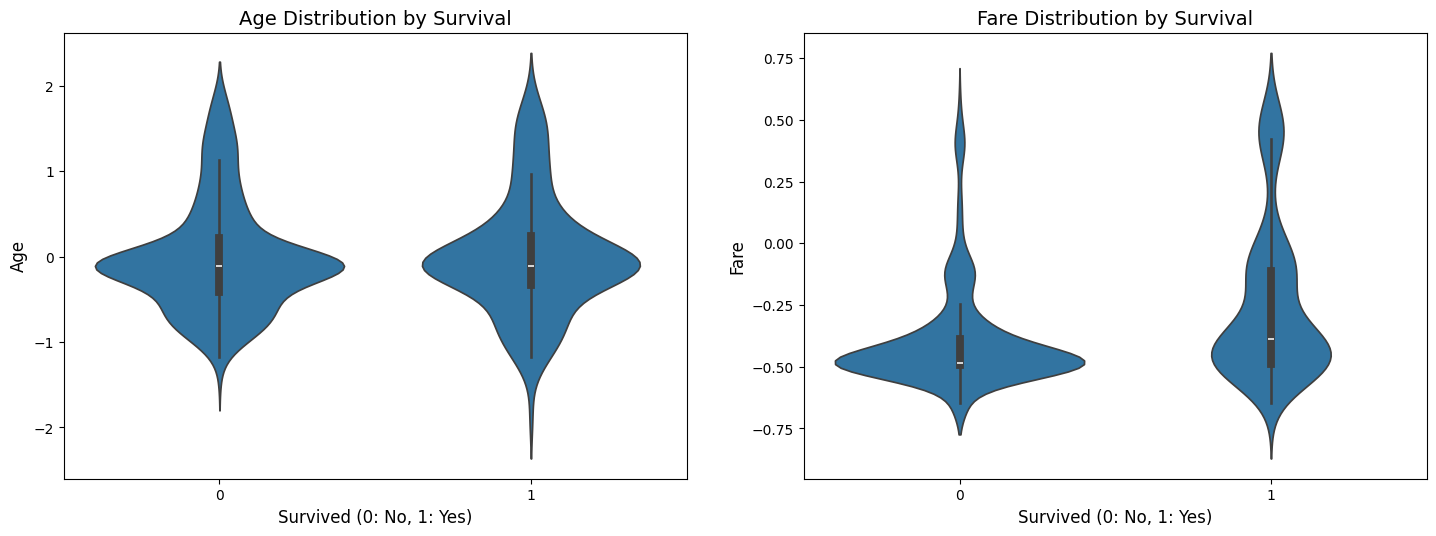

In [21]:
# --- Bivariate Analysis: Numerical vs. Survived (Violin Plots / KDE Plots) ---
print("\n--- Bivariate Analysis: Numerical Features vs. Survived ---")
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)
sns.violinplot(x='Survived', y='Age', data=df)
plt.title('Age Distribution by Survival', fontsize=14)
plt.xlabel('Survived (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Age', fontsize=12)

plt.subplot(1, 2, 2)
sns.violinplot(x='Survived', y='Fare', data=df)
plt.title('Fare Distribution by Survival', fontsize=14)
plt.xlabel('Survived (0: No, 1: Yes)', fontsize=12)
plt.ylabel('Fare', fontsize=12)
plt.tight_layout(pad=3.0)
plt.show()

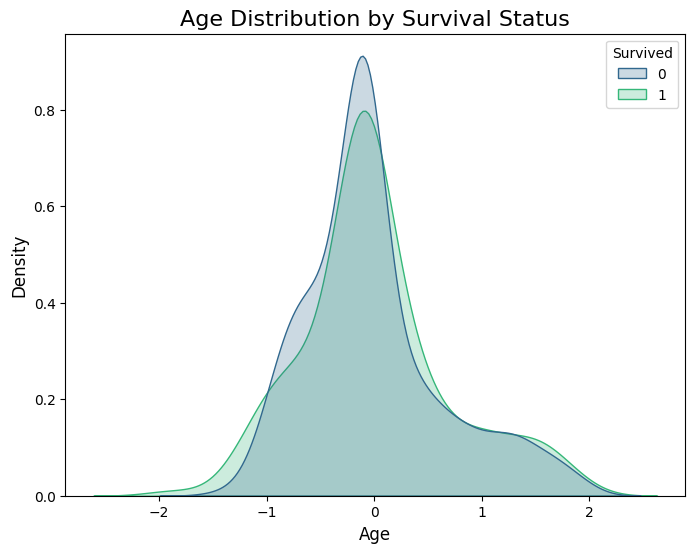

In [22]:
# KDE plot for Age distribution by survival (more detailed)
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Age', hue='Survived', fill=True, common_norm=False, palette='viridis')
plt.title('Age Distribution by Survival Status', fontsize=16)
plt.xlabel('Age', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

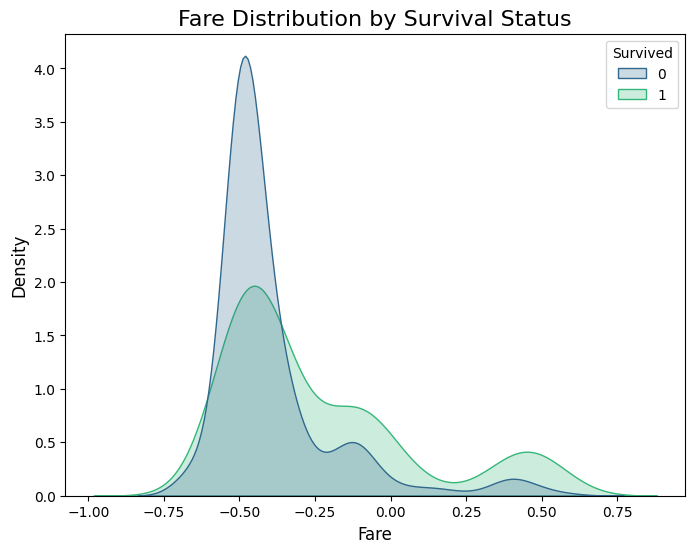

In [23]:
# KDE plot for Fare distribution by survival
plt.figure(figsize=(8, 6))
sns.kdeplot(data=df, x='Fare', hue='Survived', fill=True, common_norm=False, palette='viridis')
plt.title('Fare Distribution by Survival Status', fontsize=16)
plt.xlabel('Fare', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.show()

### Identify Patterns, Trends, Anomalies, and Make Basic Inferences
* Synthesize the findings from the summary statistics and visualizations to draw meaningful conclusions about the data. This involves identifying key patterns, trends, potential anomalies (like outliers), and making initial inferences about factors influencing survival.

In [24]:
print("\n--- Key Observations and Inferences from EDA ---")


--- Key Observations and Inferences from EDA ---


In [25]:
print("\n**1. Survival Rate Overview:**")
print("- Approximately {:.2f}% of passengers survived. This indicates an imbalance in the target variable.".format(df['Survived'].value_counts(normalize=True)[1] * 100))


**1. Survival Rate Overview:**
- Approximately 29.98% of passengers survived. This indicates an imbalance in the target variable.


In [26]:
print("\n**2. Impact of 'Sex' on Survival:**")
print("- A significant disparity in survival rates exists based on 'Sex'. As seen in the bar plot, **females (Sex=0) had a much higher survival rate than males (Sex=1)**. This aligns with the 'women and children first' protocol.")


**2. Impact of 'Sex' on Survival:**
- A significant disparity in survival rates exists based on 'Sex'. As seen in the bar plot, **females (Sex=0) had a much higher survival rate than males (Sex=1)**. This aligns with the 'women and children first' protocol.


In [27]:
print("\n**3. Influence of 'Pclass' on Survival:**")
print("- There's a clear trend: **passengers in Pclass 1 had the highest survival rate, followed by Pclass 2, and then Pclass 3 having the lowest survival rate.** This suggests socioeconomic status played a crucial role in survival.")


**3. Influence of 'Pclass' on Survival:**
- There's a clear trend: **passengers in Pclass 1 had the highest survival rate, followed by Pclass 2, and then Pclass 3 having the lowest survival rate.** This suggests socioeconomic status played a crucial role in survival.


In [28]:
print("\n**4. Age Distribution and Survival:**")
print("- The 'Age' distribution generally peaks around young adults. The boxplot for 'Age' shows some **outliers**, particularly older passengers.")
print("- The violin plot and KDE plots for 'Age' by 'Survived' often indicate that **children (very young ages) had a higher chance of survival**, and survival rates generally decline with increasing age, though there can be fluctuations.")


**4. Age Distribution and Survival:**
- The 'Age' distribution generally peaks around young adults. The boxplot for 'Age' shows some **outliers**, particularly older passengers.
- The violin plot and KDE plots for 'Age' by 'Survived' often indicate that **children (very young ages) had a higher chance of survival**, and survival rates generally decline with increasing age, though there can be fluctuations.


In [29]:
print("\n**5. 'Fare' Distribution and its Relation to Survival:**")
print("- The 'Fare' distribution is heavily **right-skewed**, meaning most passengers paid lower fares, but there are a few very high fares, indicating **significant outliers**.")
print("- The boxplot for 'Fare' clearly shows these outliers. The violin plot and KDE plot for 'Fare' by 'Survived' suggest that **passengers who paid higher fares had a better chance of survival**, which is indirectly linked to Pclass.")


**5. 'Fare' Distribution and its Relation to Survival:**
- The 'Fare' distribution is heavily **right-skewed**, meaning most passengers paid lower fares, but there are a few very high fares, indicating **significant outliers**.
- The boxplot for 'Fare' clearly shows these outliers. The violin plot and KDE plot for 'Fare' by 'Survived' suggest that **passengers who paid higher fares had a better chance of survival**, which is indirectly linked to Pclass.


In [30]:
print("\n**6. Family Size ('SibSp' and 'Parch'):**")
print("- 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard) distributions show that **most passengers traveled alone or with very small families.**")
print("- While not explicitly plotted for survival here, generally, passengers with moderate family sizes (e.g., 1-3 members) might have had slightly better survival chances than those completely alone or with very large families.")


**6. Family Size ('SibSp' and 'Parch'):**
- 'SibSp' (siblings/spouses aboard) and 'Parch' (parents/children aboard) distributions show that **most passengers traveled alone or with very small families.**
- While not explicitly plotted for survival here, generally, passengers with moderate family sizes (e.g., 1-3 members) might have had slightly better survival chances than those completely alone or with very large families.


In [31]:
print("\n**7. Embarked Port ('Embarked_C', 'Embarked_Q', 'Embarked_S'):**")
print("- Passengers who embarked from Cherbourg (C) tend to have a higher survival rate compared to those from Southampton (S) or Queenstown (Q). This could be due to differences in passenger demographics or class composition from these ports.")


**7. Embarked Port ('Embarked_C', 'Embarked_Q', 'Embarked_S'):**
- Passengers who embarked from Cherbourg (C) tend to have a higher survival rate compared to those from Southampton (S) or Queenstown (Q). This could be due to differences in passenger demographics or class composition from these ports.


In [32]:
print("\n**8. Correlation Analysis:**")
print("- **'Fare' has a positive correlation with 'Survived'**, indicating higher fares are associated with higher survival chances.")
print("- **'Pclass' has a negative correlation with 'Survived'**, meaning lower Pclass (e.g., Pclass 1) is associated with higher survival chances. This confirms our observations from the bar plot.")
print("- 'Age' shows a weak correlation with 'Survived', suggesting its relationship is not purely linear, but more complex (e.g., non-linear patterns, interaction with other features).")
print("- 'SibSp' and 'Parch' might have weak to moderate positive correlations with each other, as they both represent family size.")


**8. Correlation Analysis:**
- **'Fare' has a positive correlation with 'Survived'**, indicating higher fares are associated with higher survival chances.
- **'Pclass' has a negative correlation with 'Survived'**, meaning lower Pclass (e.g., Pclass 1) is associated with higher survival chances. This confirms our observations from the bar plot.
- 'Age' shows a weak correlation with 'Survived', suggesting its relationship is not purely linear, but more complex (e.g., non-linear patterns, interaction with other features).
- 'SibSp' and 'Parch' might have weak to moderate positive correlations with each other, as they both represent family size.


In [33]:
print("\n**9. Potential Anomalies:**")
print("- The presence of extreme outliers in 'Fare' needs attention. Depending on the modeling approach, these might need transformation or capping.")
print("- While less common in cleaned data, if any 'Age' values were unusually high or low (e.g., 0 or >100), they would be anomalies.")


**9. Potential Anomalies:**
- The presence of extreme outliers in 'Fare' needs attention. Depending on the modeling approach, these might need transformation or capping.
- While less common in cleaned data, if any 'Age' values were unusually high or low (e.g., 0 or >100), they would be anomalies.


In [34]:
print("\n**Overall Inference:**")
print("Survival on the Titanic was significantly influenced by factors such as **gender, passenger class, and the fare paid**. Age also played a role, particularly for very young passengers. These insights are crucial for feature engineering and building predictive models.")


**Overall Inference:**
Survival on the Titanic was significantly influenced by factors such as **gender, passenger class, and the fare paid**. Age also played a role, particularly for very young passengers. These insights are crucial for feature engineering and building predictive models.


**FamilySize Feature Engineering and Analysis**


Value counts for 'FamilySize':
FamilySize
1    473
2     93
3     11
Name: count, dtype: int64


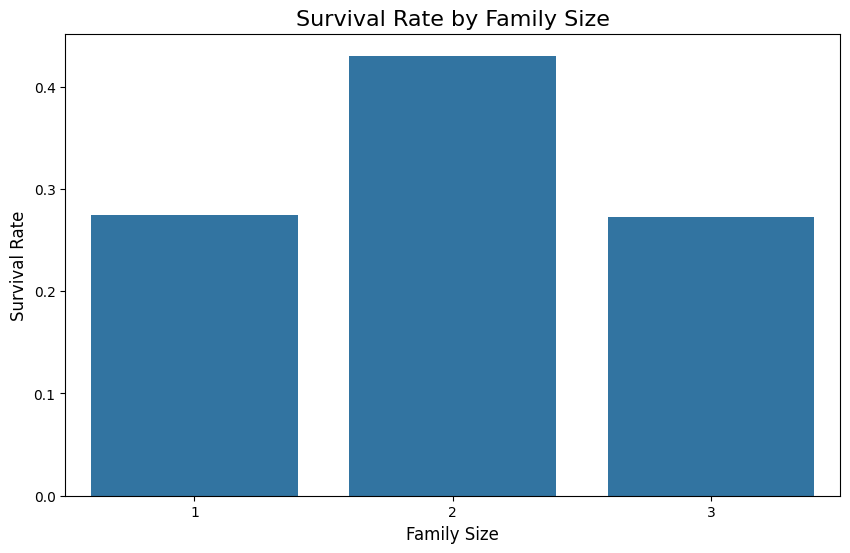

In [35]:

# Create FamilySize
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1 # +1 for the passenger themselves

print("\nValue counts for 'FamilySize':")
print(df['FamilySize'].value_counts().sort_index())

# Plot Survival Rate by FamilySize
plt.figure(figsize=(10, 6))
sns.barplot(x='FamilySize', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Family Size', fontsize=16)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

**Survival Rate by Fare Bins**


Value counts for 'FareBin':
FareBin
Very Low    148
Low         147
Medium      138
High        144
Name: count, dtype: int64


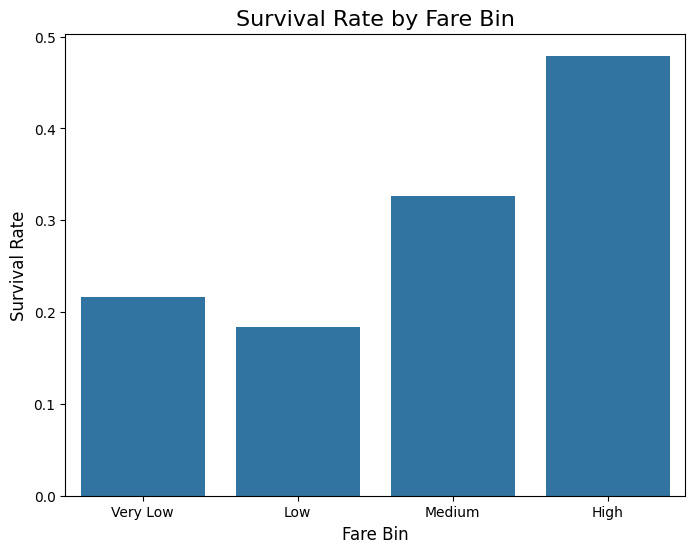

In [36]:

# Create Fare Bins (using quantiles to handle skewness)
df['FareBin'] = pd.qcut(df['Fare'], q=4, labels=['Very Low', 'Low', 'Medium', 'High'])

print("\nValue counts for 'FareBin':")
print(df['FareBin'].value_counts().sort_index())

# Plot Survival Rate by Fare Bin
plt.figure(figsize=(8, 6))
sns.barplot(x='FareBin', y='Survived', data=df, errorbar=None)
plt.title('Survival Rate by Fare Bin', fontsize=16)
plt.xlabel('Fare Bin', fontsize=12)
plt.ylabel('Survival Rate', fontsize=12)
plt.show()

# Drop the temporary 'FareBin' column
df.drop('FareBin', axis=1, inplace=True)